# Natural Language Processing Real World Use-cases

#### [@ryasy_d](https://github.com/Ryas-Yusenda)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

# <font color='F13454'> HEADING1
## <font color='28A7EC'> HEADING2
### <font color='DFBB63'> HEADING3

In [2]:
df = pd.read_csv('fake_or_real_news.csv')


# <font color='F13454'> How to obtain label distribution

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [5]:
def create_distribution(datafile):
   return sns.countplot(x='label', data=datafile, palette='hls')


<AxesSubplot:xlabel='label', ylabel='count'>

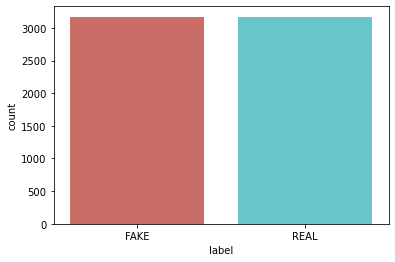

In [6]:
create_distribution(df)

In [7]:
print(df.isnull().sum(), '\n\n\n')
print(df.info())


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


# <font color='F13454'> Applying TF_IDF & Bag-of-words on Data

In [8]:
# Separate the labels and set up training and test datasets

# Get the labels
x = df['text']
y = df['label']
y.head()


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
#Split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=53)


In [10]:
# before applying ML algorithm, we have to convert our text data into 
# numbers or vector representation

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [11]:
count_vectorize = CountVectorizer(stop_words='english')


In [12]:
count_train = count_vectorize.fit_transform(X_train)
count_train.shape


(4244, 56922)

In [13]:
count_vectorize.vocabulary_


{'report': 42470,
 'copyright': 12105,
 'violation': 54177,
 'think': 50628,
 'doom': 15924,
 'sayers': 44520,
 'trump': 51896,
 'office': 35783,
 'notice': 35256,
 'glp': 21881,
 'republican': 42534,
 'bush': 8399,
 'left': 29531,
 'doomsaying': 15927,
 'increases': 25686,
 'sure': 49203,
 'effect': 16814,
 'opposite': 36087,
 'gets': 21568,
 'increase': 25684,
 'political': 38823,
 'spectrum': 47506,
 'page': 36831,
 'election': 16972,
 '232': 762,
 'photos': 38140,
 '43': 1127,
 'numbers': 35403,
 '131': 229,
 'quotes': 40794,
 'candidates': 8779,
 'center': 9445,
 'email': 17139,
 'wonder': 55615,
 'mind': 32729,
 'today': 51050,
 'notable': 35236,
 'people': 37695,
 'don': 15867,
 'miss': 32983,
 'unbelievable': 52435,
 'roundup': 43680,
 'best': 6494,
 'talked': 49772,
 'day': 13519,
 'course': 12424,
 'schindler': 44691,
 'list': 30107,
 'saddest': 44042,
 'movies': 33689,
 'time': 50906,
 'going': 21981,
 'brag': 7659,
 'chance': 9616,
 'liam': 29814,
 'neeson': 34495,
 'humili

In [14]:
count_test = count_vectorize.fit_transform(X_test)
count_test.shape


(2091, 42443)

In [15]:
tf_idf = TfidfVectorizer(stop_words='english', max_df=0.7)

In [16]:
tfidf_train = tf_idf.fit_transform(X_train)
tfidf_train.shape
tfidf_train.A[0:10]


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.0121467, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.0165804, 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [17]:
tdidf_test = tf_idf.fit_transform(X_test)

# <font color='F13454'> How to build a Pipeline.

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [19]:
nb_pipeline = Pipeline([
   ('tf_idf', tf_idf),
   ('nb_clf',MultinomialNB())
])


In [20]:
nb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('tf_idf', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [21]:
predicted_nbt = nb_pipeline.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
confusion_matrix(predicted_nbt,y_test)

array([[ 739,   31],
       [ 269, 1052]], dtype=int64)

In [24]:
accuracy_score(predicted_nbt, y_test)

0.8565279770444764

In [25]:
nbc_pipeline = Pipeline([
    ('NBVC', count_vectorize),
    ('nb_clf', MultinomialNB())
])


In [26]:
nbc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('NBVC', CountVectorizer(stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [27]:
predicted_nbc = nbc_pipeline.predict(X_test)

In [28]:
confusion_matrix(predicted_nbc,y_test)

array([[ 865,   80],
       [ 143, 1003]], dtype=int64)

In [29]:
accuracy_score(predicted_nbc,y_test)

0.893352462936394

# <font color='F13454'> Applying Multiple Algorithms on Data

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [31]:
linear_clf = Pipeline([
   ('linear', tf_idf),
   ('pa_clf', PassiveAggressiveClassifier())
])

In [32]:
linear_clf.fit(X_train, y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('pa_clf', PassiveAggressiveClassifier())])

In [33]:
pred = linear_clf.predict(X_test)

In [34]:
pred

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [35]:
confusion_matrix(y_test,pred)

array([[955,  53],
       [ 84, 999]], dtype=int64)

In [36]:
accuracy_score(y_test, pred)

0.9344811095169775

In [37]:
## creating a classification report
from sklearn import metrics
print(metrics.classification_report(y_test, pred))


              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93      1008
        REAL       0.95      0.92      0.94      1083

    accuracy                           0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091



In [44]:
from joblib import dump, load
dump(linear_clf, 'filename.joblib')


['filename.joblib']

# <font color='F13454'> Some best practices that u can think of-->>


In [57]:

# function to run for prediction
def detecting_fake_news(var):

    #retrieving the best model for prediction
    ## load your sav model
    model = open('filename.joblib', 'rb')
    load_model = load(model)
    prediction = load_model.predict([var])

    return (print("The given statement is ", prediction[0]))


In [59]:
# var = input("Please enter the news text you want to verify: ")
var = "CMA investigates Google and Meta over ad tech concerns"

#retrieving the best model for prediction
detecting_fake_news(var)

## EXAMPLE 
#  CMA investigates Google and Meta over ad tech concerns
#  Heatwave temperature threshold raised in England by Met Office


The given statement is  FAKE
